<a href="https://colab.research.google.com/github/Saif-Sayyad/DiseasePredictor/blob/main/MyMLw_oFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset, dataset.csv should be in files

In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv')

See the dataset

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

Assigning None to empty columns

In [ ]:
print(df.isnull().sum())
# You might want to fill these with 'None' or another appropriate value
df = df.fillna('None')

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


Encoding Categorical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import pandas as pd

# Label encode the Disease column
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

# One-hot encode the symptom columns
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6',
                   'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
                   'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

symptom_encoded = ohe.fit_transform(df[symptom_columns])

# Create new dataframe with encoded features
# Get the original symptom names from the OneHotEncoder
symptom_columns_encoded = ohe.get_feature_names_out(symptom_columns)

# Remove the prefix (1_, 2_, ..., 17_) and the leading 'Symptom_'
# Remove the prefix (Symptom_1_, Symptom_2_, etc.), unnecessary spaces, and numbers
symptom_columns_encoded = [name.split('_', 1)[1].lstrip('0123456789_').replace(' ', '') for name in symptom_columns_encoded]

# Optionally, you can print the cleaned symptom names to verify
print(symptom_columns_encoded)


# Create the DataFrame with updated symptom names
df_encoded = pd.DataFrame(symptom_encoded, columns=symptom_columns_encoded)

# Add the Disease column back
df_encoded['Disease'] = df['Disease']

# Display the new DataFrame
print(df_encoded.head())


['acidity', 'back_pain', 'bladder_discomfort', 'breathlessness', 'burning_micturition', 'chest_pain', 'chills', 'constipation', 'continuous_sneezing', 'cough', 'cramps', 'fatigue', 'headache', 'high_fever', 'indigestion', 'joint_pain', 'mood_swings', 'muscle_wasting', 'muscle_weakness', 'neck_pain', 'pain_during_bowel_movements', 'patches_in_throat', 'pus_filled_pimples', 'shivering', 'skin_rash', 'stiff_neck', 'stomach_pain', 'sunken_eyes', 'vomiting', 'weakness_in_limbs', 'weight_gain', 'weight_loss', 'yellowish_skin', 'itching', 'abdominal_pain', 'acidity', 'anxiety', 'blackheads', 'bladder_discomfort', 'blister', 'breathlessness', 'bruising', 'chest_pain', 'chills', 'cold_hands_and_feets', 'cough', 'cramps', 'dehydration', 'dizziness', 'fatigue', 'foul_smell_ofurine', 'headache', 'high_fever', 'indigestion', 'joint_pain', 'knee_pain', 'lethargy', 'loss_of_appetite', 'mood_swings', 'nausea', 'neck_pain', 'nodal_skin_eruptions', 'pain_during_bowel_movements', 'pain_in_anal_region', '

In [ ]:
from sklearn.model_selection import train_test_split

# Define your target (Disease column) and features (all original features)
X = df_encoded.drop(columns=['Disease'])  # Use all features excluding 'Disease'
y = df_encoded['Disease']  # The target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Export training and testing sets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Training set size: (3444, 408)
Testing set size: (1476, 408)


Train Test Split
*   X_train: Training features
*   X_test: Testing features
*   y_train: Training Disease
*   y_test: Testing Disease

In [ ]:
from sklearn.model_selection import train_test_split

# Define your target (Disease column) and features (all original features)
X = df_encoded.drop(columns=['Disease'])  # Use all features excluding 'Disease'
y = df_encoded['Disease']  # The target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the data types of X_train and y_train
print(type(X_train), type(y_train))

# Remove duplicate columns from X_train and X_test
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Check for missing values in X_train and y_train
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("Missing values in y_train:")
print(y_train.isnull().sum())


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Missing values in X_train:
acidity                0
back_pain              0
bladder_discomfort     0
breathlessness         0
burning_micturition    0
                      ..
runny_nose             0
stomach_bleeding       0
congestion             0
blood_in_sputum        0
loss_of_smell          0
Length: 132, dtype: int64
Missing values in y_train:
0


**XGBClassifier Algo**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29        32
           1       1.00      1.00      1.00        39
           2       1.00      0.29      0.45        41
           3       1.00      0.17      0.29        36
           4       1.00      0.37      0.54        35
           5       0.80      1.00      0.89        36
           6       1.00      0.39      0.56        44
           7       1.00      1.00      1.00        32
           8       1.00      0.40      0.57        35
           9       0.18      0.93      0.31        30
          10       0.58      1.00      0.74        31
          11       1.00      0.45      0.62        40
          12       1.00      0.39      0.57        33
          13       1.00      0.91      0.95        45
          14       1.00      0.26      0.41        35
          15       1.00      0.39      0.56        28
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**RandomForest Algo**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.18      1.00      0.30        32
           1       1.00      1.00      1.00        39
           2       1.00      0.29      0.45        41
           3       1.00      0.17      0.29        36
           4       1.00      0.37      0.54        35
           5       1.00      1.00      1.00        36
           6       1.00      0.39      0.56        44
           7       1.00      1.00      1.00        32
           8       1.00      0.40      0.57        35
           9       0.18      0.93      0.31        30
          10       0.58      1.00      0.74        31
          11       1.00      0.45      0.62        40
          12       1.00      0.39      0.57        33
          13       1.00      1.00      1.00        45
          14       1.00      0.26      0.41        35
          15       1.00      0.39      0.56        28
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Logistic Regression Algo**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29        32
           1       1.00      1.00      1.00        39
           2       1.00      0.29      0.45        41
           3       1.00      0.17      0.29        36
           4       1.00      0.37      0.54        35
           5       1.00      1.00      1.00        36
           6       1.00      0.39      0.56        44
           7       1.00      1.00      1.00        32
           8       1.00      0.40      0.57        35
           9       0.18      0.93      0.31        30
          10       0.58      1.00      0.74        31
          11       1.00      0.45      0.62        40
          12       1.00      0.39      0.57        33
          13       1.00      1.00      1.00        45
          14       1.00      0.26      0.41        35
          15       1.00      0.39      0.56        28
          16       1.00      0.93      0.96

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Support Vector Machine Algo**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Support Vector Classifier model
svc_model = SVC(random_state=42)

# Train the model on the training set
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.18      1.00      0.30        32
           1       1.00      1.00      1.00        39
           2       1.00      0.29      0.45        41
           3       1.00      0.17      0.29        36
           4       1.00      0.37      0.54        35
           5       1.00      1.00      1.00        36
           6       1.00      0.39      0.56        44
           7       1.00      1.00      1.00        32
           8       1.00      0.40      0.57        35
           9       0.18      0.93      0.31        30
          10       0.58      1.00      0.74        31
          11       1.00      0.45      0.62        40
          12       1.00      0.39      0.57        33
          13       1.00      1.00      1.00        45
          14       1.00      0.26      0.41        35
          15       1.00      0.39      0.56        28
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1500x1500 with 0 Axes>

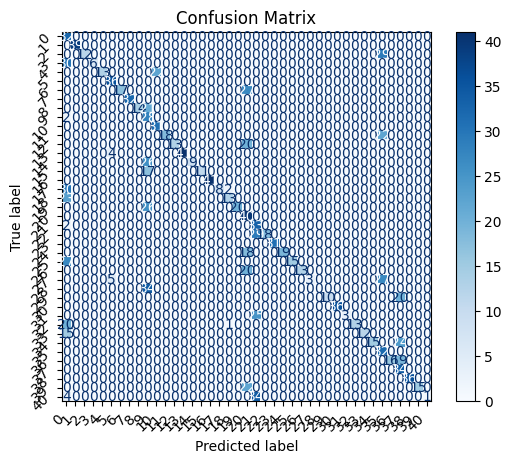

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Increase figure size
plt.figure(figsize=(15, 15))  # Adjust the size as needed

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

plt.title("Confusion Matrix")
plt.show()


Testing using a short dictionary

In [ ]:
# Assuming your model is named 'xgb_model'
fitted_feature_names = xgb_model.feature_names_in_
print(fitted_feature_names)
# Print feature names from the training data
feature_names = X_train.columns
print(feature_names)


['acidity' 'back_pain' 'bladder_discomfort' 'breathlessness'
 'burning_micturition' 'chest_pain' 'chills' 'constipation'
 'continuous_sneezing' 'cough' 'cramps' 'fatigue' 'headache' 'high_fever'
 'indigestion' 'joint_pain' 'mood_swings' 'muscle_wasting'
 'muscle_weakness' 'neck_pain' 'pain_during_bowel_movements'
 'patches_in_throat' 'pus_filled_pimples' 'shivering' 'skin_rash'
 'stiff_neck' 'stomach_pain' 'sunken_eyes' 'vomiting' 'weakness_in_limbs'
 'weight_gain' 'weight_loss' 'yellowish_skin' 'itching' 'abdominal_pain'
 'anxiety' 'blackheads' 'blister' 'bruising' 'cold_hands_and_feets'
 'dehydration' 'dizziness' 'foul_smell_ofurine' 'knee_pain' 'lethargy'
 'loss_of_appetite' 'nausea' 'nodal_skin_eruptions' 'pain_in_anal_region'
 'restlessness' 'skin_peeling' 'sweating' 'swelling_joints'
 'ulcers_on_tongue' 'weakness_of_one_body_side' 'altered_sensorium'
 'bloody_stool' 'blurred_and_distorted_vision' 'continuous_feel_of_urine'
 'dark_urine' 'diarrhoea' 'dischromic_patches' 'extra_mar

In [ ]:
import pandas as pd

# List all symptom columns from your DataFrame
all_symptoms = ['acidity', 'back_pain', 'bladder_discomfort', 'breathlessness',
'burning_micturition', 'chest_pain', 'chills', 'constipation',
'continuous_sneezing', 'cough', 'cramps', 'fatigue', 'headache', 'high_fever',
'indigestion', 'joint_pain', 'mood_swings', 'muscle_wasting',
'muscle_weakness', 'neck_pain', 'pain_during_bowel_movements',
'patches_in_throat', 'pus_filled_pimples', 'shivering', 'skin_rash',
'stiff_neck', 'stomach_pain', 'sunken_eyes', 'vomiting', 'weakness_in_limbs',
'weight_gain', 'weight_loss', 'yellowish_skin', 'itching', 'abdominal_pain',
'anxiety', 'blackheads', 'blister', 'bruising', 'cold_hands_and_feets',
'dehydration', 'dizziness', 'foul_smell_ofurine', 'knee_pain', 'lethargy',
'loss_of_appetite', 'nausea', 'nodal_skin_eruptions', 'pain_in_anal_region',
'restlessness', 'skin_peeling', 'sweating', 'swelling_joints',
'ulcers_on_tongue', 'weakness_of_one_body_side', 'altered_sensorium',
'bloody_stool', 'blurred_and_distorted_vision', 'continuous_feel_of_urine',
'dark_urine', 'diarrhoea', 'dischromic_patches', 'extra_marital_contacts',
'hip_joint_pain', 'loss_of_balance', 'movement_stiffness', 'obesity',
'red_sore_around_nose', 'scurring', 'silver_like_dusting',
'spinning_movements', 'swelling_of_stomach', 'watering_from_eyes',
'distention_of_abdomen', 'excessive_hunger', 'family_history',
'irregular_sugar_level', 'irritation_in_anus', 'lack_of_concentration',
'painful_walking', 'passage_of_gases', 'small_dents_in_nails',
'spotting_urination', 'swollen_legs', 'yellow_crust_ooze',
'yellowing_of_eyes', 'None', 'history_of_alcohol_consumption',
'inflammatory_nails', 'internal_itching', 'mucoid_sputum',
'swollen_blood_vessels', 'unsteadiness', 'depression', 'fast_heart_rate',
'fluid_overload', 'malaise', 'prominent_veins_on_calf',
'puffy_face_and_eyes', 'swelled_lymph_nodes', 'enlarged_thyroid',
'irritability', 'mild_fever', 'muscle_pain', 'phlegm', 'yellow_urine',
'brittle_nails', 'drying_and_tingling_lips', 'increased_appetite',
'visual_disturbances', 'pain_behind_the_eyes', 'polyuria', 'slurred_speech',
'swollen_extremeties', 'throat_irritation', 'toxic_look_(typhos)',
'abnormal_menstruation', 'acute_liver_failure', 'belly_pain',
'receiving_blood_transfusion', 'red_spots_over_body', 'redness_of_eyes',
'rusty_sputum', 'coma', 'palpitations', 'receiving_unsterile_injections',
'sinus_pressure', 'runny_nose', 'stomach_bleeding', 'congestion',
'blood_in_sputum', 'loss_of_smell'
]

# Function to create input for the model
def create_symptom_input(present_symptoms):
    # Initialize a dictionary with all symptoms set to 0
    symptom_dict = {symptom: 0 for symptom in all_symptoms}

    # Set the present symptoms to 1
    for symptom in present_symptoms:
        if symptom in symptom_dict:
            symptom_dict[symptom] = 1
        else:
            print(f"Warning: {symptom} is not in the list of symptoms.")

    # Convert the dictionary to a DataFrame
    return pd.DataFrame([symptom_dict])



In [ ]:
# Example usage
present_symptoms = ['joint_pain', 'knee_pain', 'neck_pain',  'swelling_joints',]  # Add only the present symptoms
test_df = create_symptom_input(present_symptoms)
predicted_disease = xgb_model.predict(test_df)
# Assuming 'le' is your LabelEncoder instance for the Disease column
predicted_disease_encoded = predicted_disease[0]
print(predicted_disease[0])  # Get the encoded predicted disease
predicted_disease_name = le.inverse_transform([predicted_disease_encoded])  # Convert back to the original label

# Print the predicted disease name
print(f"Predicted Disease: {predicted_disease_name[0]}")

31
Predicted Disease: Osteoarthristis
